In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import pandas as pd

# `1.Dataset from Tensor Slices`

In [4]:
ds = tf.constant([
    [1,2,3],
    [4,5,6]
],dtype=tf.float32)

ds1 = tf.data.Dataset.from_tensors(ds)
ds2 = tf.data.Dataset.from_tensor_slices(ds)

print(ds,"\n\n")

for d in [ds1,ds2]:
    for ele in d:
        print(ele)
    print("\n")

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32) 


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)




# `2.Dataset from Numpy arrays`

In [15]:
train,test = tf.keras.datasets.fashion_mnist.load_data()

images,label = train

print(type(images),type(label))

train_ds = tf.data.Dataset.from_tensor_slices(train)

train_ds

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

# `3.Dataset form TextLine Dataset`

In [25]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/illiad/"

file_names = ['cowper.txt','derby.txt','butler.txt']

data  = [
    tf.keras.utils.get_file(file_name,url+file_name) for file_name in file_names
]

data = tf.data.TextLineDataset(data)

for line in data.take(4):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'


# `4.Dataset from Directory`

In [33]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

data = tf.keras.utils.get_file(origin=url,untar=True,cache_dir="stack_overflow",cache_subdir="")

data_dir = pathlib.Path(data).parent

train_dir = data_dir/'train'

tf.keras.utils.text_dataset_from_directory(train_dir,subset="training",validation_split=0.2,batch_size=32,seed=2)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# `5.Dataset from CSV File`

In [67]:
titanic_data = tf.keras.utils.get_file("train.csv",
                              "https://storage.googleapis.com/tf-dataset/titanic.train.csv")

df = pd.read_csv(titanic_data)
df.head(5)

train_ds  = tf.data.Dataset.from_tensor_slices(dict(df))

for feature in train_ds.take(1):
    for key,value in feature.items():
        print(f"{key:<20} : {value}")

train_batches = tf.data.experimental.make_csv_dataset(data,batch_size=4,label_name="survived",select_columns=["fare","sex","survived"])

print("\n")
for feature,label in train_batches.take(1):
    print(f"Survived : {label}")
    for key,value in feature.items():
        print(f"{key:<20} : {value}")

survived             : 0
sex                  : b'male'
age                  : 22.0
n_siblings_spouses   : 1
parch                : 0
fare                 : 7.25
class                : b'Third'
deck                 : b'unknown'
embark_town          : b'Southampton'
alone                : b'n'


Survived : [1 0 0 0]
sex                  : [b'female' b'male' b'male' b'male']
fare                 : [83.475  0.    33.    52.   ]


# `6.Dataset  from set of file`

In [74]:
flowers_root = tf.keras.utils.get_file("flower_photos",
                               "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
                               untar=True)

flowers_root = pathlib.Path(flowers_root)

for item in flowers_root.glob("*"):
    print(item)

C:\Users\HP\.keras\datasets\flower_photos\daisy
C:\Users\HP\.keras\datasets\flower_photos\dandelion
C:\Users\HP\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\HP\.keras\datasets\flower_photos\roses
C:\Users\HP\.keras\datasets\flower_photos\sunflowers
C:\Users\HP\.keras\datasets\flower_photos\tulips


# `7.Batching Datasets`

In [62]:
ds1 = tf.data.Dataset.range(100)
ds2 = tf.data.Dataset.range(0,-100,-1)

ds = tf.data.Dataset.zip((ds1,ds2))
ds = tf.data.Dataset.batch(ds,batch_size=4)

for ele in ds.take(4):
    for arr in ele:
        print(arr.numpy())

[0 1 2 3]
[ 0 -1 -2 -3]
[4 5 6 7]
[-4 -5 -6 -7]
[ 8  9 10 11]
[ -8  -9 -10 -11]
[12 13 14 15]
[-12 -13 -14 -15]


## Padded Batching

In [66]:
ds_ = ds1.map(lambda x : tf.fill([tf.cast(x,tf.int32)],x))

padded_ds = ds_.padded_batch(4,padded_shapes=(None,))

for batch in padded_ds.take(4):
    print(batch.numpy())

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]
[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]
[[ 8  8  8  8  8  8  8  8  0  0  0]
 [ 9  9  9  9  9  9  9  9  9  0  0]
 [10 10 10 10 10 10 10 10 10 10  0]
 [11 11 11 11 11 11 11 11 11 11 11]]
[[12 12 12 12 12 12 12 12 12 12 12 12  0  0  0]
 [13 13 13 13 13 13 13 13 13 13 13 13 13  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14  0]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]]


## Shuffling Dataset

In [69]:
dataset = tf.data.TextLineDataset(titanic_data)
dataset.shuffle(buffer_size=10)

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

# Preprocessing


In [78]:
import os

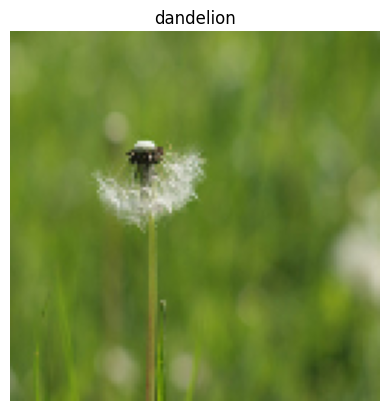

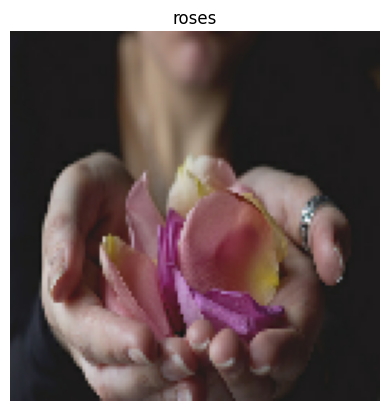

In [82]:
file_path = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

def parse_images(filename):
    label = tf.strings.split(filename,os.sep)[-2]
    img = tf.io.read_file(filename)
    img = tf.io.decode_jpeg(img)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = tf.image.resize(img,[128,128])
    return img,label

image_ds = file_path.map(parse_images)

def show_images(image,label):
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")
    plt.show()
    
for img,label in image_ds.take(2):
    show_images(img,label)

# Using Keras Layers

In [83]:
train,test = tf.keras.datasets.fashion_mnist.load_data()

img,label = train
img = img/255
label = label.astype(np.int32)

train_ds = tf.data.Dataset.from_tensor_slices((img,label))
train_ds = train_ds.shuffle(5000).batch(32)

#dummy model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.fit(train_ds,epochs=2)

loss,accuracy = model.evaluate(train_ds)
print(f"Loss  : {loss} , Accuracy : {accuracy}")

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5998 - accuracy: 0.7972
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4592 - accuracy: 0.8407
Loss  : 0.4592384696006775 , Accuracy : 0.8406500220298767
